In [31]:
from __future__ import division
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import grid_search
from sklearn import neighbors
from sklearn import linear_model

<div class = "alert alert-success" style = "border-radius:10px"><b><font size = 5>Importing and cleaning the data</b></font><br>
We start by following these steps : 

<br>Modifying the target variable (Churn?) using one-hot encoding, so that this categorial variable is encoded into a dummy variable.<br>Then, dropping three columns : (Phone) because it is reasonable to assume it is irrelevant; (Churn?) because it is our target variable; finally, we decided to drop (State) and (Area Code) features because we want to see if there are certain generalities independent of location.<br>We also use one-hot encoding on the two other categorical variables (Int'l Plan) and (VMail Plan) <br> 
We are going to decide on the accuracy score, validation method and model first -- and then we will "play" with features
on the basis of their relevance for the problem we are tacklng.</div>

In [32]:
df = pd.DataFrame.from_csv('./files/churn.csv')
y = np.where(df['Churn?'] == 'True.',1,0)
df.reset_index(inplace=True)

columns_to_drop = ['State', 'Churn?', 'Phone',"Area Code"]
df.drop(columns_to_drop, inplace=True, axis = 1)

yes_no_cols = ["Int'l Plan","VMail Plan"]
df[yes_no_cols] = df[yes_no_cols] == 'yes'
df["Int'l Plan"] = np.where(df["Int'l Plan"] == True,1,0)
df["VMail Plan"]=  np.where(df["VMail Plan"]== True,1,0)

features = df.columns
X = df.as_matrix().astype(np.float)

In [33]:
df

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
6,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
7,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0
8,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
9,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0


<div class = "alert alert-success" style = "border-radius:10px"><font size = 5><b>1. K-Neighbors Classification</b></font><br><br>1.1. Using Train/Test/Validation split<br><br> </div>

In [34]:
indexes = np.random.permutation(range(0,len(y)))
X_val = [X[x] for x in (indexes[0:len(y)*0.1])]
y_val = [y[x] for x in (indexes[0:len(y)*0.1])]

X_without_val = [X[x] for x in (indexes[len(y)*0.1:])]
y_without_val = [y[x] for x in (indexes[len(y)*0.1:])]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [35]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_without_val, y_without_val, train_size=0.7, random_state=42)

<div class = "alert alert-success" style = "border-radius:10px">1.1.1. Exploring the effect of scaling and of changing the number of neighbours</div>

In [36]:
accuracy = []
for x in range(1, 100):    
    clf = neighbors.KNeighborsClassifier(n_neighbors = x)
    clf.fit(X_train,y_train)
    yhat = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test,yhat))

In [37]:
accuracy_scale = []
for x in range(1, 100):    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = neighbors.KNeighborsClassifier(n_neighbors = x)
    clf.fit(X_train_scaled,y_train)
    yhat = clf.predict(X_test_scaled)

    accuracy_scale.append(metrics.accuracy_score(y_test,yhat))

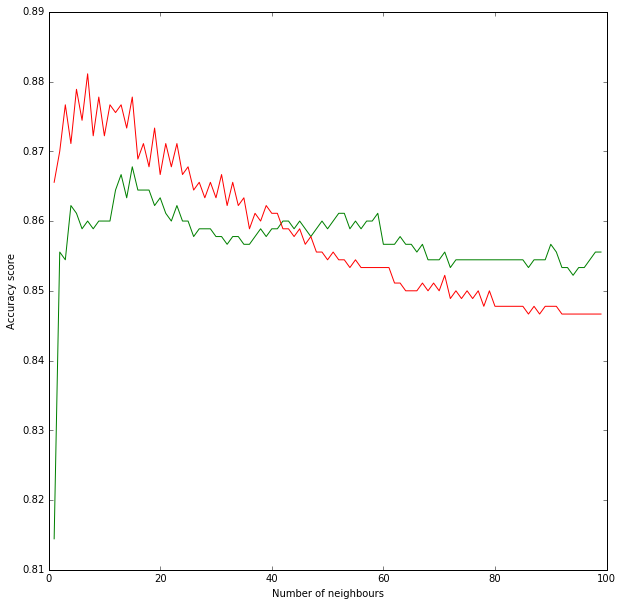

In [38]:
plt.figure(figsize=[10,10])
plt.plot(range(1, 100), accuracy, color='green')
plt.plot(range(1, 100), accuracy_scale, color='red')
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy score')
plt.legend();

<div class = "alert alert-info">Based on the graph above, we decided that 3 neighbours in combination with scaled data is the best option.<br>
Let us notice that odd values give better accuracies if compared "locally".</div>

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

clf = neighbors.KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train_scaled,y_train)
yhat = clf.predict(X_test_scaled)
yhat_val = clf.predict(X_val_scaled)

print 'The model accuracy on the test set is %.4f' % metrics.accuracy_score(y_test,yhat)
print 'The model accuracy on the validation set is %.4f' % metrics.accuracy_score(y_val,yhat_val)

print metrics.classification_report(y_val,yhat_val)

The model accuracy on the test set is 0.8767
The model accuracy on the validation set is 0.8589
             precision    recall  f1-score   support

          0       0.88      0.97      0.92       284
          1       0.55      0.22      0.32        49

avg / total       0.83      0.86      0.83       333



<div class = "alert alert-success" style = "border-radius:10px">1.1.2. Plotting the ROC curve and calculating the area under it. This is a way to assess the overall performance of the method which can be applied also in presence of unbalanced datasets. Indeed, a random classifier has area under the curve given by 0.5, while a perfect classifier area 1. Comparing our area with these two values, we have a measue of how far we are from the perfect (or the random) classification.

<br>
More precisely, the area under the curve stands for the probability that a classifier will rank a randomly chosen true positive higher than a randomly chosen true negative (provided that positie observations are ranked higher). </div>

The area under the curve is 0.79


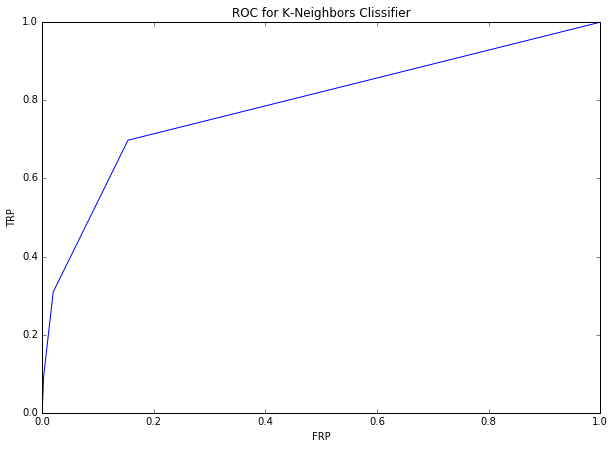

In [40]:
score = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = metrics.roc_curve(y_test,score[:,1])

plt.figure(figsize=[10,7])
plt.title('ROC for K-Neighbors Clissifier')
plt.plot(fpr,tpr)
plt.xlabel('FRP')
plt.ylabel('TRP')

print "The area under the curve is %.2f" % metrics.auc(fpr,tpr);

<div class = "alert alert-info">
We know that phone companies are particularly interested in detecting clients that are likely to churn, in order to be able to target them with ads in the hope of retaining them. As a consequence, we want to avoid missing to predict clients who are likely to churn. In other words, we want to minimize the number of false negatives of class one, namely the number of elements which are predicted not to churn but that actually do it. <br><br>

For the previous model,  the accuracy score is quite high, and the area under the ROC is closer to 1.0 than to 0.5. Nevertheless, according to the recall metrics, the False Negatives constitute 65% of all real positives. We deduce that from the value of the recall for the class 1, namely the ratio between False Negatives and all actual positives which is equal to 
$$1-recall =1-\frac{TP}{TP+FN}=\frac{FN}{TP+FN}.$$



<br> Analogously, according to the precision metrics, the False Positives consitute 20% of all predicted positives. 

In our problem we are very concerned about the False Negatives, so this model wouldn't work well for us.
</div>

<div class = "alert alert-success" style = "border-radius:10px">1.2. Using cross validation</div>

In [41]:
cv = cross_validation.KFold(X.shape[0], n_folds = 50, random_state=42)
yhat = np.zeros((X.shape[0],1))
for train_idx, test_idx in cv:
    X_train,y_train = X[train_idx,:],y[train_idx]
    X_test,y_test = X[test_idx,:],y[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    
    clf = neighbors.KNeighborsClassifier(n_neighbors = 3)
    clf.fit(X_train_scaled,y_train)
    
    X_test_scaled = scaler.transform(X_test)
    yhat[test_idx] = clf.predict(X_test_scaled).reshape(-1,1)

print metrics.classification_report(y,yhat)
print metrics.accuracy_score(y,yhat)

             precision    recall  f1-score   support

          0       0.91      0.98      0.94      2850
          1       0.76      0.41      0.53       483

avg / total       0.88      0.89      0.88      3333

0.89498949895


<div class = "alert alert-info">We tried to use K-fold classification, but it did not help. The accuracy does not improve and, worse still, the number of False Negatives is still high. We hypothesize that a good solution might be assigning different weights to our two classes, as we are dealing with an unbalanced dataset, in the sense that the set of "churning customer" is smaller than that of "non-churning".
</div>

<div class = "alert alert-success" style = "border-radius:10px"><font size = 5><b>2. Logistic regression</b></font><br><br>We try logisitc regression because k-neighbors does not allow to assign different weights to the two classes. We also decided to only use K-fold cross-validation, since it performed about the same as splitting in train/test/validaton in the previous experiment, but this way we don't loose data.</div>

In [42]:
cv = cross_validation.KFold(X.shape[0],n_folds = 10,random_state=42)
parameters = {'class_weight' : [{1:0.01},{1:0.1},{1:1},{1:10},{1:100}]}

for train_idx, test_idx in cv:
    X_train,y_train = X[train_idx,:],y[train_idx]
    X_test,y_test = X[test_idx,:],y[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    lr = linear_model.LogisticRegression()
    lr = grid_search.GridSearchCV(lr, parameters)
    lr.fit(X_train,y_train)
    yhat = lr.predict(X_test_scaled)

print metrics.classification_report(y_test,yhat)
print str(lr.best_params_)
print metrics.accuracy_score(y_test,yhat)

             precision    recall  f1-score   support

          0       0.87      0.95      0.91       286
          1       0.35      0.17      0.23        47

avg / total       0.80      0.84      0.81       333

{'class_weight': {1: 1}}
0.837837837838


<div class = "alert alert-success" style = "border-radius:10px">Plotting the ROC curve and calculating the area under it to assess "goodness" of the method.</div>

The area under the curve is 0.93


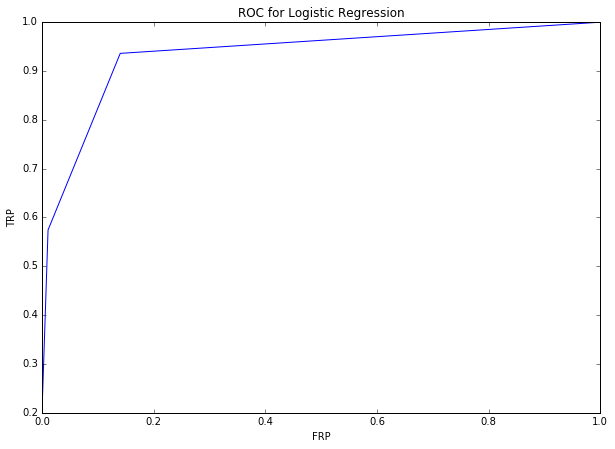

In [43]:
score = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = metrics.roc_curve(y_test,score[:,1])

plt.figure(figsize=[10,7])
plt.title('ROC for Logistic Regression')
plt.plot(fpr,tpr)
plt.xlabel('FRP')
plt.ylabel('TRP')

print "The area under the curve is %.2f" % metrics.auc(fpr,tpr);

<div class = "alert alert-info">The result is worse in terms of percentage of False Negatives, even assigning different weights to the two classes. In fact, the best result is obtained by keeping the same weights. Therefore, we look for another classifier which might allow to account for the fact that the data set is unbalanced.<br> Moreover, we observe that ROC curves (both for K-neighbors and logisitc regression) do not have the expected smooth shape. This is another reason to look for a better algorithm.
</div>

<div class = "alert alert-success" style = "border-radius:10px"><font size = 5><b>3. Random Forest Classifier</b></font><br><br>
Now we move to random forest classifier, with both K-fold cross validation and grid  search on weights. </div>

In [44]:
cv = cross_validation.KFold(X.shape[0],n_folds = 10,random_state=42)
yhat = np.zeros((X.shape[0],1))

parameters = {'class_weight' : [{1:0.01},{1:0.1},{1:1},{1:2},{1:3},{1:5},{1:10},{1:100}],"n_estimators":[1,10,20]}

i=0
acc = np.zeros((10,))

for train_idx, test_idx in cv:
    X_train,y_train = X[train_idx,:],y[train_idx]
    X_test,y_test = X[test_idx,:],y[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    
    clf = RandomForestClassifier()
    clf = grid_search.GridSearchCV(clf, parameters, scoring='f1')
    
    clf.fit(X_train_scaled,y_train)
    
    X_test_scaled = scaler.transform(X_test)
    
    yhat[test_idx] = clf.predict(X_test_scaled).reshape(-1,1)
    acc[i] = metrics.accuracy_score(yhat[test_idx], y_test)
    i+=1
    
    print str(clf.best_params_)
    
print '\nAccuracy score: ' + str(metrics.accuracy_score(y,yhat))
print metrics.classification_report(y,yhat)

{'n_estimators': 20, 'class_weight': {1: 1}}
{'n_estimators': 20, 'class_weight': {1: 1}}
{'n_estimators': 20, 'class_weight': {1: 1}}
{'n_estimators': 10, 'class_weight': {1: 1}}
{'n_estimators': 20, 'class_weight': {1: 0.1}}
{'n_estimators': 20, 'class_weight': {1: 1}}
{'n_estimators': 20, 'class_weight': {1: 1}}
{'n_estimators': 20, 'class_weight': {1: 0.1}}
{'n_estimators': 20, 'class_weight': {1: 1}}
{'n_estimators': 20, 'class_weight': {1: 1}}

Accuracy score: 0.953795379538
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      2850
          1       0.94      0.73      0.82       483

avg / total       0.95      0.95      0.95      3333



The area under the curve is 0.96


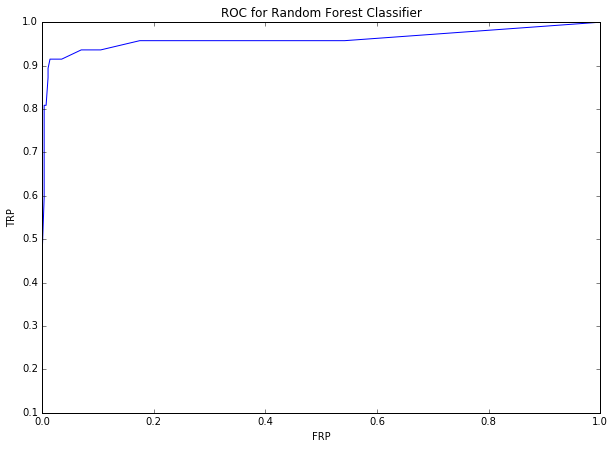

In [45]:
score = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = metrics.roc_curve(y_test,score[:,1])

plt.figure(figsize=[10,7])
plt.title('ROC for Random Forest Classifier')
plt.plot(fpr,tpr)
plt.xlabel('FRP')
plt.ylabel('TRP')

print "The area under the curve is %.2f" % metrics.auc(fpr,tpr);

<div class = "alert alert-info">
The result is much better and we also notice that it is improved by assigning different weights to the two classes which was expected.  Also, the number of false negatives is strongly reduced. Bases on this result, we will use the <b>random forest classifier with K-fold cross validation assigning weights 1:0.1</b>. </div>

<div class = "alert alert-success" style = "border-radius:10px"><font size = 5><b>Playing with features</b></font></div>

In [46]:
df = pd.DataFrame.from_csv('./files/churn.csv')
y = np.where(df['Churn?'] == 'True.',1,0)
df.reset_index(inplace=True)

col_list = ['Day Mins', 'Eve Mins', 'Night Mins']
df['Total_Mins'] = df[col_list].sum(axis=1)

col_list = ['Day Calls', 'Eve Calls', 'Night Calls']
df['Total_Calls'] = df[col_list].sum(axis=1)

col_list = ['Day Charge', 'Eve Charge', 'Night Charge']
df['Total_Charge'] = df[col_list].sum(axis=1)

columns_to_drop = ['State', 'Churn?', 'Phone','Day Calls', 'Eve Calls', 'Night Calls', 'Day Mins', 'Eve Mins', 'Night Mins','Day Charge', 'Eve Charge', 'Night Charge']
df.drop(columns_to_drop, inplace=True, axis = 1)

yes_no_cols = ["Int'l Plan","VMail Plan"]
df[yes_no_cols] = df[yes_no_cols] == 'yes'
df["Int'l Plan"] = np.where(df["Int'l Plan"] == True,1,0)
df["VMail Plan"]=  np.where(df["VMail Plan"]== True,1,0)

features = df.columns
X = df.as_matrix().astype(np.float)

In [47]:
df

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Total_Mins,Total_Calls,Total_Charge
0,128,415,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,107,415,0,1,26,13.7,3,3.70,1,611.5,329,55.54
2,137,415,0,0,0,12.2,5,3.29,0,527.2,328,59.00
3,84,408,1,0,0,6.6,7,1.78,2,558.2,248,65.02
4,75,415,1,0,0,10.1,3,2.73,3,501.9,356,49.36
5,118,510,1,0,0,6.3,6,1.70,0,647.9,317,65.91
6,121,510,0,1,24,7.5,7,2.03,3,779.3,314,76.28
7,147,415,1,0,0,7.1,6,1.92,0,471.9,269,44.98
8,117,408,0,0,0,8.7,4,2.35,1,751.9,267,70.97
9,141,415,1,1,37,11.2,5,3.02,0,807.0,292,77.52


In [48]:
cv = cross_validation.KFold(X.shape[0],n_folds = 10,random_state=42)
yhat = np.zeros((X.shape[0],1))

acc = np.zeros((10,))

for train_idx, test_idx in cv:
    X_train,y_train = X[train_idx,:],y[train_idx]
    X_test,y_test = X[test_idx,:],y[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    clf = RandomForestClassifier(class_weight = {1:0.1})
    
    clf.fit(X_train_scaled,y_train)
    yhat[test_idx] = clf.predict(X_test_scaled).reshape(-1,1)    
    
print '\nAccuracy score: ' + str(metrics.accuracy_score(y,yhat))
print '\n' + metrics.classification_report(y,yhat)

print "The area under the curve is %.2f" % metrics.auc(fpr,tpr);


Accuracy score: 0.969396939694

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2850
          1       0.97      0.81      0.88       483

avg / total       0.97      0.97      0.97      3333

The area under the curve is 0.96


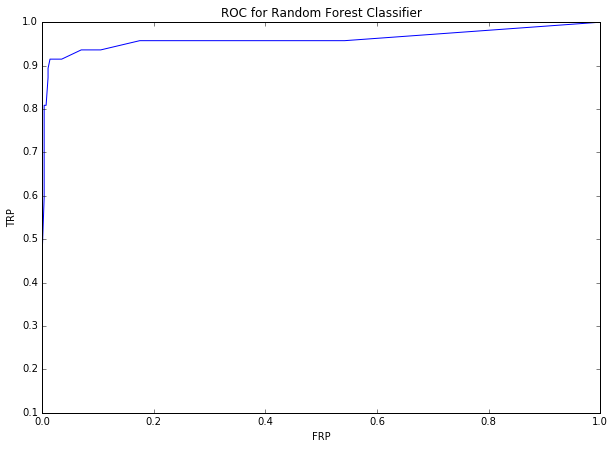

In [49]:
plt.figure(figsize=[10,7])
plt.title('ROC for Random Forest Classifier')
plt.plot(fpr,tpr)

plt.xlabel('FRP')
plt.ylabel('TRP')


<div In tt
</div>

<div class = "alert alert-info">
In this section, we have reduced the dimensionality of the datasets by merging different features according to our own reasoning. We have supposed that the important information about a client is contained in the number of minutes they spend talking, the number of calls they make and the overall price they pay. In the original dataset, each one of this pieces of information was split into three columns, realative to day/evening/night calls. 
Of course, if we knew that there are huge differences between the pricing at different times of the day, it would be better to keep the three separate features at least for one among calls/charge/minutes.


<br>
In our case, merging the all 9 columns into three allows for an important improvement in the precision metrics. Hence, the tradeoff between reducing the dimensionality and loosing detail is highly advantageous for the choice we have made.
Most importantly, we have only two percent of False Negatives (over all the real positives).
</div>

<div class = "alert alert-success" style = "border-radius:10px"><b><font size = 5>Decision Tree +sorting features through classifier </b></font><br>
Now we apply a different approach. We start by adding all the features as above but do not remove any of them.
</div>

In [50]:
df = pd.DataFrame.from_csv('./files/churn.csv')
y = np.where(df['Churn?'] == 'True.',1,0)
df.reset_index(inplace=True)

col_list = ['Day Mins', 'Eve Mins', 'Night Mins']
df['Total_Mins'] = df[col_list].sum(axis=1)

col_list = ['Day Calls', 'Eve Calls', 'Night Calls']
df['Total_Calls'] = df[col_list].sum(axis=1)

col_list = ['Day Charge', 'Eve Charge', 'Night Charge']
df['Total_Charge'] = df[col_list].sum(axis=1)

yes_no_cols = ["Int'l Plan","VMail Plan"]
df[yes_no_cols] = df[yes_no_cols] == 'yes'
df["Int'l Plan"] = np.where(df["Int'l Plan"] == True,1,0)
df["VMail Plan"]=  np.where(df["VMail Plan"]== True,1,0)

columns_to_drop = ['State',"Area Code",'Phone',"Churn?"]
df.drop(columns_to_drop, inplace=True, axis = 1)


features = df.columns
X = df.as_matrix().astype(np.float)

In [51]:
df

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Total_Mins,Total_Calls,Total_Charge
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,707.2,300,72.86
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,611.5,329,55.54
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,527.2,328,59.00
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,558.2,248,65.02
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,501.9,356,49.36
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,647.9,317,65.91
6,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,779.3,314,76.28
7,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,471.9,269,44.98
8,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,751.9,267,70.97
9,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,807.0,292,77.52


<div class = "alert alert-success" style = "border-radius:10px">
We have 20 features. We run a single Decision Tree Classifier and get the same accuracy as Random Forest. Note that for Decision trees and Random forest feature scaling is not necessary. 
<div/>

In [52]:
cv = cross_validation.KFold(X.shape[0],n_folds = 10,shuffle=True)
yhat = np.zeros((X.shape[0],))

acc = np.zeros((10,))
i = 0
for train_idx, test_idx in cv:
    X_train,y_train = X[train_idx,:],y[train_idx]
    X_test,y_test = X[test_idx,:],y[test_idx]
    
    
    clf = DecisionTreeClassifier(class_weight = {1:1,0:1},min_samples_split=100)
    clf.fit(X_train,y_train)
    yhat[test_idx] = clf.predict(X_test).reshape(-1,1)
    
    acc[i] = metrics.accuracy_score(yhat[test_idx],y[test_idx])
    i += 1


print acc.mean()
print '\nAccuracy score: ' + str(metrics.accuracy_score(y,yhat))
print '\nRecall score: ' + str(metrics.recall_score(y,yhat))
print '\n' + metrics.classification_report(y,yhat)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


0.96790203377

Accuracy score: 0.967896789679

Recall score: 0.809523809524

             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2850
          1       0.96      0.81      0.88       483

avg / total       0.97      0.97      0.97      3333



<div class = "alert alert-success" style = "border-radius:10px">
Now we sort the features in order of importance for classifier and leave the top 7 most essential ones.
<div/>

In [53]:
to_drop = []
order = clf.feature_importances_.argsort()[::-1]
for weight in order:
    print clf.feature_importances_[weight], features[weight]
    
to_drop = to_drop + features[order][7:].tolist()
print "\nFeatures to drop",to_drop

0.460598638659 Total_Charge
0.133332766498 CustServ Calls
0.120512471588 VMail Plan
0.100599785757 Intl Mins
0.0813039077548 Int'l Plan
0.0754475078417 Intl Calls
0.0051258220766 Night Calls
0.00497976625264 Intl Charge
0.00436207575869 Total_Mins
0.00347156739395 Day Charge
0.00331276095124 Account Length
0.00320580634504 Night Mins
0.00161892240137 VMail Message
0.000531265237572 Eve Calls
0.000431688512159 Day Calls
0.000419763551475 Total_Calls
0.000286511143813 Night Charge
0.000175567546796 Eve Mins
0.000161145744127 Day Mins
0.000122258985969 Eve Charge

Features to drop ['Intl Charge', 'Total_Mins', 'Day Charge', 'Account Length', 'Night Mins', 'VMail Message', 'Eve Calls', 'Day Calls', 'Total_Calls', 'Night Charge', 'Eve Mins', 'Day Mins', 'Eve Charge']


In [54]:
df = pd.DataFrame.from_csv('./files/churn.csv')
y = np.where(df['Churn?'] == 'True.',1,0)
df.reset_index(inplace=True)

col_list = ['Day Mins', 'Eve Mins', 'Night Mins']
df['Total_Mins'] = df[col_list].sum(axis=1)

col_list = ['Day Calls', 'Eve Calls', 'Night Calls']
df['Total_Calls'] = df[col_list].sum(axis=1)

col_list = ['Day Charge', 'Eve Charge', 'Night Charge']
df['Total_Charge'] = df[col_list].sum(axis=1)

yes_no_cols = ["Int'l Plan","VMail Plan"]
df[yes_no_cols] = df[yes_no_cols] == 'yes'
df["Int'l Plan"] = np.where(df["Int'l Plan"] == True,1,0)
df["VMail Plan"]=  np.where(df["VMail Plan"]== True,1,0)

columns_to_drop = ['State',"Area Code",'Phone',"Churn?"] + to_drop
df.drop(columns_to_drop, inplace=True, axis = 1)


features = df.columns
X = df.as_matrix().astype(np.float)

<div class = "alert alert-success" style = "border-radius:10px">
After dropping non-essential features our feature space is only 7-dimensional.
<div/>

In [55]:
df

,Int'l Plan,VMail Plan,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Total_Charge
0,0,1,91,10.0,3,1,72.86
1,0,1,103,13.7,3,1,55.54
2,0,0,104,12.2,5,0,59.00
3,1,0,89,6.6,7,2,65.02
4,1,0,121,10.1,3,3,49.36
5,1,0,118,6.3,6,0,65.91
6,0,1,118,7.5,7,3,76.28
7,1,0,96,7.1,6,0,44.98
8,0,0,90,8.7,4,1,70.97
9,1,1,97,11.2,5,0,77.52


<div class = "alert alert-success" style = "border-radius:10px"> 
We retrain our Decision trees using smaller amount of features and still receive the same accuracy.
<div/>

In [56]:
cv = cross_validation.KFold(X.shape[0],n_folds = 10,shuffle=True)
yhat = np.zeros((X.shape[0],))

acc = np.zeros((10,))
i = 0
for train_idx, test_idx in cv:
    X_train,y_train = X[train_idx,:],y[train_idx]
    X_test,y_test = X[test_idx,:],y[test_idx]
    
    clf = DecisionTreeClassifier(class_weight = {1:1,0:1},min_samples_split=100)
    clf.fit(X_train,y_train)
    yhat[test_idx] = clf.predict(X_test).reshape(-1,1)
    
    acc[i] = metrics.accuracy_score(y[test_idx],yhat[test_idx])
    i += 1


print acc.mean()
print '\nAccuracy score: ' + str(metrics.accuracy_score(y,yhat))
print '\nRecall score: ' + str(metrics.recall_score(y,yhat))
print '\n' + metrics.classification_report(y,yhat)

0.968793044542

Accuracy score: 0.968796879688

Recall score: 0.813664596273

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2850
          1       0.97      0.81      0.88       483

avg / total       0.97      0.97      0.97      3333



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


<div class = "alert alert-success" style = "border-radius:10px"> 
Below is the script for selecting best parameters for our Decision tree used above. The scoring used is F1.
<div/>

In [57]:
cv = cross_validation.KFold(X.shape[0],n_folds = 10,shuffle = True)
yhat = np.zeros((X.shape[0],1))

parameters = {'class_weight': [{1:0.01},{1:0.1},{1:1},{1:2},{1:3},{1:5},{1:10},{1:100}],"min_samples_split":[2,10,50,75,100,110]}

i=0
acc = np.zeros((10,))

for train_idx, test_idx in cv:
    X_train,y_train = X[train_idx,:],y[train_idx]
    X_test,y_test = X[test_idx,:],y[test_idx]
    
    clf = DecisionTreeClassifier()
    clf = grid_search.GridSearchCV(clf, parameters, scoring='f1')
    
    clf.fit(X_train,y_train)
    
    yhat[test_idx] = clf.predict(X_test).reshape(-1,1)
    acc[i] = metrics.accuracy_score(yhat[test_idx], y_test)
    i+=1
    
    print str(clf.best_params_)
    
print '\nAccuracy score: ' + str(metrics.accuracy_score(y,yhat))
print metrics.classification_report(y,yhat)

{'min_samples_split': 110, 'class_weight': {1: 1}}
{'min_samples_split': 100, 'class_weight': {1: 1}}
{'min_samples_split': 100, 'class_weight': {1: 1}}
{'min_samples_split': 110, 'class_weight': {1: 1}}
{'min_samples_split': 100, 'class_weight': {1: 2}}
{'min_samples_split': 75, 'class_weight': {1: 1}}
{'min_samples_split': 100, 'class_weight': {1: 1}}
{'min_samples_split': 110, 'class_weight': {1: 1}}
{'min_samples_split': 100, 'class_weight': {1: 1}}
{'min_samples_split': 110, 'class_weight': {1: 1}}

Accuracy score: 0.965796579658
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2850
          1       0.95      0.81      0.87       483

avg / total       0.97      0.97      0.96      3333



<div class = "alert alert-info">
In the previous sections, we made reasonable assumptions on the meaning and importance of the features to drop and/or merge some of them. Here, we relied on the decision of the classifier regarding which features we should drop and which to retain.
In this way, we have obtained a comparable result with a "cheaper" classifier. <br>
Notice that reflecting upon the features has still been useful, because we created two novel features (Total calls and Total Charge) which have been deemed essential by the classifier (thus we retained them) and has allowed us to drop 6 of the initial features (Day/Evening/Night calls and charge) retaining part of the information.
<div/>

<div class = "alert alert-info">
We propose this last model. 
Indeed, it allows us to obtain virtually the same result using a simpler and quicker classifier. 

<br><br>
In order to choose the metrics by which it is better to classify our parameters, we should know the ratio 
$$\frac{cost \hspace{0.1cm} of \hspace{0.1cm} FP}{Cost \hspace{0.1cm} of \hspace{0.1cm}FN}.$$
This would also allow us to choose an optimal operating point. Indeed, we know that companies do not want to miss people who will churn, but at the same time, an excess of false positives would result in wasting money in unnecessary ads (and offers).
<div/>